In [1]:
import os
import numpy as np
import soundfile as sf
from tqdm import tqdm

In [7]:
from easydict import EasyDict as edict

args = edict({
    'data_dir': 'data_train',
    'librispeech_path': 'LibriSpeech/train-clean-100/'
})

def set_args():
    return args

In [ ]:

# Note: Make sure to merge word alignment txt files from
#       https://github.com/CorentinJ/librispeech-alignments


# librispeech_path -> reader_id -> chapter_id -> flac

args = set_args()

os.makedirs(args.data_dir, exist_ok=True)
l_dir, ds, _ = next(os.walk(args.librispeech_path))

words = []
index = []
for r_id in tqdm(ds):
    os.makedirs(os.path.join(args.data_dir, r_id), exist_ok=True)
    r_dir, ds, _ = next(os.walk(os.path.join(l_dir, r_id)))
    for c_id in ds:
        os.makedirs(os.path.join(args.data_dir, r_id, c_id), exist_ok=True)
        c_dir, _, fs = next(os.walk(os.path.join(r_dir, c_id)))
        alignment_fn = f"{r_id}-{c_id}.alignment.txt"
        with open(os.path.join(c_dir, alignment_fn), 'r') as f:
            lines  = f.readlines()
        
        for l in lines:
            # l is in format of 'FILENAME ",WORD1,WORD2,...," "TIME1,TIME2,..."'
            fn, ws, ts = l.split()
            
            s_id = int(fn.split('-')[-1])
            os.makedirs(os.path.join(args.data_dir, r_id, c_id, str(s_id)), exist_ok=True)
            #  assert int(fn.split('-')[-1]) == s_id, "Sentence ID should match"
            
            fn = fn + '.flac'
            ws = ws[1: -1].split(',')
            ts = [0] + [float(t) for t in ts[1: -1].split(',')]
            ts = list(zip(ts[: -1], ts[1:]))
            assert len(ws) == len(ts)


            wav, sr = sf.read(os.path.join(c_dir, fn))
            wav = (wav * 32767).astype(np.int16)

            for w_id, (w, t) in enumerate(zip(ws, ts)):

                if w:    # exclude silence word
                    
                    start_t, end_t = t
                    d = wav[int(start_t * sr): int(end_t * sr) + 1]
                    sf.write(os.path.join(args.data_dir, r_id, c_id, str(s_id), str(w_id) + '.wav'), d, sr)
                    words.append(w)
                    index.append(f"{r_id}-{c_id}-{s_id}-{w_id}")

                    

with open(os.path.join(args.data_dir, f"words.txt"), 'w') as f:
    f.write(' '.join(words))
with open(os.path.join(args.data_dir, f"index.txt"), 'w') as f:
    f.write(' '.join(index))


 30%|████████████████████████▌                                                        | 76/251 [22:01<57:45, 19.80s/it]

# Using Torch Audio
torch audio load wav file


https://github.com/SeanNaren/deepspeech.pytorch/issues/383

Torch audio faster because c++ implemetation


about 1261824 files for 6gb data

might have to split the data into folders


```
data
    +- reader_id
        +- chapter_id
            +- sentence_id
                +- word_id
    +- README.md
    +- words.txt
    +- index.txt

```

# TODO: multiple workers on dataloader becomes much slower

In [22]:
data = np.load('data/1089-134686.npz')
data['word_cnt']

array(721)

In [7]:
LibriSpeech/test-clean/61/70970/61-70970-0000.flac

SyntaxError: invalid syntax (4116620678.py, line 1)

In [8]:
alignment_path = 'LibriSpeech/test-clean/61/70968/61-70968.alignment.txt'
data_root_dir = 'LibriSpeech/test-clean/'

In [9]:
# reader-id
# chapter-id

# decided through traversal
reader_id = '61'
chapter_id = '70968'

alignment_txt = f"{reader_id}-{chapter_id}.alignment.txt"
cur_dir = os.path.join(data_root_dir, reader_id, chapter_id)

In [10]:

with open(os.path.join(cur_dir, alignment_txt), 'r') as f:
    lines = f.readlines()


In [11]:
data = []
words = []
for line in lines:
    fn, ws, ts = line.split()

    fn = fn + '.flac'
    ws = ws[1: -1].split(',')
    ts = [0] + [float(t) for t in ts[1: -1].split(',')]
    ts = list(zip(ts[: -1], ts[1:]))
    assert len(ws) == len(ts)

    wav, sr = sf.read(os.path.join(cur_dir, fn))
    print(os.path.join(cur_dir, fn))
    
    for w, t in zip(ws, ts):
        
        if w:    # not silence word
            start_t, end_t = t
            d = (wav[int(start_t * sr): int(end_t * sr) + 1] * 32767).astype(np.int16)
            data.append(d)
            words.append(w)






LibriSpeech/test-clean/61/70968/61-70968-0000.flac
LibriSpeech/test-clean/61/70968/61-70968-0001.flac
LibriSpeech/test-clean/61/70968/61-70968-0002.flac
LibriSpeech/test-clean/61/70968/61-70968-0003.flac
LibriSpeech/test-clean/61/70968/61-70968-0004.flac
LibriSpeech/test-clean/61/70968/61-70968-0005.flac
LibriSpeech/test-clean/61/70968/61-70968-0006.flac
LibriSpeech/test-clean/61/70968/61-70968-0007.flac
LibriSpeech/test-clean/61/70968/61-70968-0008.flac
LibriSpeech/test-clean/61/70968/61-70968-0009.flac
LibriSpeech/test-clean/61/70968/61-70968-0010.flac
LibriSpeech/test-clean/61/70968/61-70968-0011.flac
LibriSpeech/test-clean/61/70968/61-70968-0012.flac
LibriSpeech/test-clean/61/70968/61-70968-0013.flac
LibriSpeech/test-clean/61/70968/61-70968-0014.flac
LibriSpeech/test-clean/61/70968/61-70968-0015.flac
LibriSpeech/test-clean/61/70968/61-70968-0016.flac
LibriSpeech/test-clean/61/70968/61-70968-0017.flac
LibriSpeech/test-clean/61/70968/61-70968-0018.flac
LibriSpeech/test-clean/61/70968

In [12]:
import numpy as np

np.savez('tmp.npz', *data)
with open('tmp.txt', 'w') as f:
    f.writelines(words)

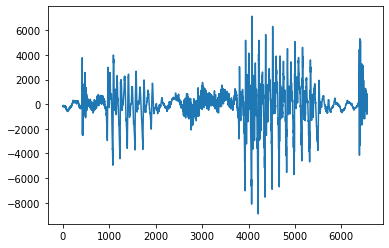

In [13]:
import matplotlib.pyplot as plt
from IPython.display import Audio

plt.plot(data[4])
itr = iter(range(20))

In [19]:
Audio(data[next(itr)] * 2**15, rate=sr)

In [15]:
Audio(wav, rate=sr)

In [7]:
# _, reader_ids, _ = next(os.walk(data_root_dir))
# for reader_id in reader_ids:
#     _, chapter_ids, _ = next(os.walk(os.path.join(data_root_dir, reader_id)))
#     for chapter_id in chapter_ids:
#         files = os.listdir...

In [38]:
# dict
# num_of_words
# data
# for each reader_id and chapter_id, you make .npy data
# just do one giant and load mmap_mode='r' and access with multiple workers
# how to save them?
# let's just do separately


In [36]:

data = np.load('tmp.npz', mmap_mode='r')

In [39]:

data['arr_0']


array([ 183,  193,  183, ..., 2406, 2399, 2322], dtype=int16)

```
data
  +- [READER_ID]-[CHAPTER_ID].npy
  +- [READER_ID]-[CHAPTER_ID].txt
  +- 61-70968.npy
  +- 61-70968.txt
  ...
```
